<a href="https://colab.research.google.com/github/TejashwiniDonoju/EDUNET/blob/main/Temperature_efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


### **Load Data**

In [ ]:

df_proj = pd.read_csv("/content/sample_data/Projected annual temperature change (2045-2065 Celsius) - Data.csv")

print(df_proj.shape)
print(df_proj.head())


(13512, 28)
  Country code Country name     Series code  \
0          ABW        Aruba  AG.LND.EL5M.ZS   
1          ADO      Andorra  AG.LND.EL5M.ZS   
2          AFG  Afghanistan  AG.LND.EL5M.ZS   
3          AGO       Angola  AG.LND.EL5M.ZS   
4          ALB      Albania  AG.LND.EL5M.ZS   

                           Series name SCALE Decimals   1990 1991 1992 1993  \
0  Land area below 5m (% of land area)     0        1  29.57   ..   ..   ..   
1  Land area below 5m (% of land area)     0        1   0.00   ..   ..   ..   
2  Land area below 5m (% of land area)     0        1   0.00   ..   ..   ..   
3  Land area below 5m (% of land area)     0        1   0.21   ..   ..   ..   
4  Land area below 5m (% of land area)     0        1   4.97   ..   ..   ..   

   ... 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011  
0  ...   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  
1  ...   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  
2  ...   ..   ..   ..   ..   ..   ..   ..   ..   ..  

### **Data Cleaning & Preparation**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/sample_data/Projected annual temperature change (2045-2065 Celsius) - Data.csv")

df = df.replace("..", np.nan)

year_cols = [col for col in df.columns if col.isdigit()]
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

df["feature_mean"] = df[year_cols].mean(axis=1)

df_clean = df[["Country name", "Series name", "feature_mean"]]

print(df_clean.head())
print(df_clean.shape)


  Country name                          Series name  feature_mean
0        Aruba  Land area below 5m (% of land area)         29.57
1      Andorra  Land area below 5m (% of land area)          0.00
2  Afghanistan  Land area below 5m (% of land area)          0.00
3       Angola  Land area below 5m (% of land area)          0.21
4      Albania  Land area below 5m (% of land area)          4.97
(13512, 3)


### **Pivot table**

In [ ]:
# Pivot table: rows = countries, columns = indicators (Series name)
df_pivot = df_clean.pivot_table(
    index="Country name",
    columns="Series name",
    values="feature_mean"
)

# Reset index to make 'Country name' a column again
df_pivot = df_pivot.reset_index()

print(df_pivot.shape)
print(df_pivot.head())



(233, 49)
Series name    Country name  Access to electricity (% of total population)  \
0               Afghanistan                                           15.6   
1                   Albania                                            NaN   
2                   Algeria                                           99.3   
3            American Samoa                                            NaN   
4                   Andorra                                            NaN   

Series name  Access to improved sanitation (% of total pop.)  \
0                                                      33.25   
1                                                      92.75   
2                                                      91.80   
3                                                        NaN   
4                                                     100.00   

Series name  Access to improved water source (% of total pop.)  \
0                                                        28.25   
1   

### **Fill missing values**

In [ ]:
df_pivot_filled = df_pivot.fillna(df_pivot.mean(numeric_only=True))

print(df_pivot_filled.shape)
print(df_pivot_filled.isna().sum().sum(), "missing values remain")


(233, 49)
0 missing values remain


### **Applying KMeans**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df_pivot_filled.drop(columns=["Country name"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_pivot_filled["Cluster"] = kmeans.fit_predict(X_scaled)

print(df_pivot_filled[["Country name", "Cluster"]].head(10))


Series name         Country name  Cluster
0                    Afghanistan        3
1                        Albania        1
2                        Algeria        1
3                 American Samoa        1
4                        Andorra        1
5                         Angola        3
6            Antigua and Barbuda        1
7                      Argentina        1
8                        Armenia        1
9                          Aruba        1


### **Visualization**

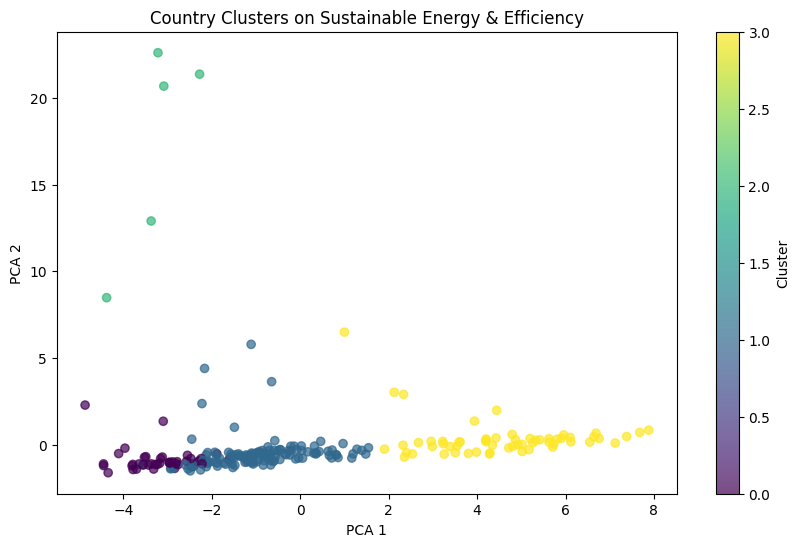

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_pivot_filled["Cluster"], cmap="viridis", alpha=0.7)
plt.colorbar(label="Cluster")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Country Clusters on Sustainable Energy & Efficiency")
plt.show()


### **Cluster Counts**

In [ ]:
cluster_counts = df_pivot_filled["Cluster"].value_counts().sort_index()
print("Cluster counts:")
print(cluster_counts)


Cluster counts:
Cluster
0     41
1    128
2      5
3     59
Name: count, dtype: int64


### **Sample**

In [ ]:
cluster_counts = df_pivot_filled["Cluster"].value_counts().sort_index()
print("Cluster counts:")
print(cluster_counts)

for c in sorted(df_pivot_filled["Cluster"].unique()):
    print(f"\nCluster {c} sample countries:")
    print(df_pivot_filled[df_pivot_filled["Cluster"] == c]["Country name"].head(5).to_list())



Cluster 0 sample countries:
['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei Darussalam']

Cluster 1 sample countries:
['Albania', 'Algeria', 'American Samoa', 'Andorra', 'Antigua and Barbuda']

Cluster 2 sample countries:
['High income', 'Low & middle income', 'Middle income', 'Upper middle income', 'World']

Cluster 3 sample countries:
['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Burkina Faso']


### **Summary table**

In [ ]:
cluster_counts = df_pivot_filled["Cluster"].value_counts().sort_index()
print("Cluster counts:")
print(cluster_counts)

for c in sorted(df_pivot_filled["Cluster"].unique()):
    print(f"\nCluster {c} sample countries:")
    print(df_pivot_filled[df_pivot_filled["Cluster"] == c]["Country name"].head(5).to_list())

numeric_cols = df_pivot_filled.drop(columns=["Country name", "Cluster"]).columns

cluster_means = df_pivot_filled.groupby("Cluster")[numeric_cols].mean().round(2)
print("\nCluster averages (summary table):")
print(cluster_means)



Cluster averages (summary table):
Series name  Access to electricity (% of total population)  \
Cluster                                                      
0                                                    73.94   
1                                                    74.69   
2                                                    78.84   
3                                                    43.52   

Series name  Access to improved sanitation (% of total pop.)  \
Cluster                                                        
0                                                      94.08   
1                                                      78.15   
2                                                      63.92   
3                                                      30.16   

Series name  Access to improved water source (% of total pop.)  \
Cluster                                                          
0                                                        97.52   
1        

### **PCA Plot**

In [ ]:
cluster_counts = df_pivot_filled["Cluster"].value_counts().sort_index()
print("Cluster counts:")
print(cluster_counts)

for c in sorted(df_pivot_filled["Cluster"].unique()):
    print(f"\nCluster {c} sample countries:")
    print(df_pivot_filled[df_pivot_filled["Cluster"] == c]["Country name"].head(5).to_list())

numeric_cols = df_pivot_filled.drop(columns=["Country name", "Cluster"]).columns

cluster_means = df_pivot_filled.groupby("Cluster")[numeric_cols].mean().round(2)
print("\nCluster averages (summary table):")
print(cluster_means)

import plotly.express as px

fig = px.scatter(
    x=X_pca[:,0],
    y=X_pca[:,1],
    color=df_pivot_filled["Cluster"].astype(str),
    hover_name=df_pivot_filled["Country name"],
    title="Country Clusters (Interactive PCA)"
)

fig.show()


In [ ]:
pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 116.6 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("/content/sample_data/Projected annual temperature change (2045-2065 Celsius) - Data.csv")

st.title("🌍 Country Clusters on Sustainable Energy & Efficiency")

X = df.select_dtypes(include=["number"])

if X.empty:
    st.error("⚠️ No numeric columns found in the dataset. Please check your CSV.")
else:

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    df["Cluster"] = kmeans.fit_predict(X_scaled)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    st.write("### Sample of Clustered Data")
    if "Country name" in df.columns:
        st.dataframe(df[["Country name", "Cluster"]].head(10))
    else:
        st.dataframe(df.head(10))

    st.write("### Cluster Counts")
    st.bar_chart(df["Cluster"].value_counts())


    if "Country name" in df.columns:
        st.write("### Sample Countries per Cluster")
        for c in df["Cluster"].unique():
            st.write(f"**Cluster {c}:**")
            st.write(df[df["Cluster"] == c]["Country name"].head(5).tolist())

    st.write("### Cluster Averages")
    st.dataframe(df.groupby("Cluster").mean(numeric_only=True))

    st.write("### PCA Visualization of Clusters")
    fig, ax = plt.subplots(figsize=(10, 6))
    scatter = ax.scatter(
        X_pca[:, 0], X_pca[:, 1],
        c=df["Cluster"], cmap="viridis", alpha=0.7
    )
    plt.colorbar(scatter, label="Cluster")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    ax.set_title("Country Clusters")
    st.pyplot(fig)


2025-09-13 17:29:31.511 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-13 17:29:31.892 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-13 17:29:31.894 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-13 17:29:31.896 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-13 17:29:31.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-13 17:29:31.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-13 17:29:31.902 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
!streamlit run app.py



Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [ ]:
!pip install streamlit pyngrok


In [ ]:
%%writefile app.py


Writing app.py


In [ ]:
!ngrok authtoken 32edhGuzTCCKRVdGEHpOBoeAJuo_2KvAxk8MHxfV2qkbZWuo1


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

get_ipython().system_raw('streamlit run app.py &')

public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://1c1eb6270b03.ngrok-free.app" -> "http://localhost:8501">

In [ ]:
%%writefile app.py


Overwriting app.py


In [ ]:
%%writefile requirements.txt
streamlit
pandas
scikit-learn
matplotlib
plotly


Writing requirements.txt


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px

url = "/content/sample_data/Projected annual temperature change (2045-2065 Celsius) - Data.csv"
df = pd.read_csv(url)

df = df.replace("..", np.nan)

year_cols = [col for col in df.columns if col.isdigit()]
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

df["feature_mean"] = df[year_cols].mean(axis=1)

df_clean = df[["Country name", "Series name", "feature_mean"]]

df_pivot = df_clean.pivot_table(
    index="Country name",
    columns="Series name",
    values="feature_mean"
).reset_index()

df_pivot_filled = df_pivot.fillna(df_pivot.mean(numeric_only=True))

X = df_pivot_filled.drop(columns=["Country name"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_pivot_filled["Cluster"] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pivot_filled["PCA1"] = X_pca[:,0]
df_pivot_filled["PCA2"] = X_pca[:,1]

st.title("Country Clusters on Sustainable Energy & Efficiency")

st.write("### Sample of clustered data")
st.dataframe(df_pivot_filled[["Country name", "Cluster"]].head(10))

cluster_counts = df_pivot_filled["Cluster"].value_counts().sort_index()
st.write("### Cluster counts")
st.write(cluster_counts)

st.write("### Sample countries per cluster")
for c in sorted(df_pivot_filled["Cluster"].unique()):
    st.write(f"**Cluster {c}:**", df_pivot_filled[df_pivot_filled["Cluster"] == c]["Country name"].head(5).to_list())

numeric_cols = df_pivot_filled.drop(columns=["Country name", "Cluster", "PCA1", "PCA2"]).columns
cluster_means = df_pivot_filled.groupby("Cluster")[numeric_cols].mean().round(2)
st.write("### Cluster averages (summary table)")
st.dataframe(cluster_means)

fig = px.scatter(
    df_pivot_filled,
    x="PCA1",
    y="PCA2",
    color=df_pivot_filled["Cluster"].astype(str),
    hover_name="Country name",
    title="Country Clusters (Interactive PCA)"
)

st.plotly_chart(fig, use_container_width=True)


2025-09-13 18:42:38.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-13 18:42:38.428 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-13 18:42:38.430 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-13 18:42:38.433 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-13 18:42:38.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-13 18:42:38.437 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-13 18:42:38.443 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-13 18:42:38.444 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [ ]:
!cat app.py


import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Read dataset from GitHub
url = "/content/sample_data/Projected annual temperature change (2045-2065 Celsius) - Data.csv"
df = pd.read_csv(url)

df = df.replace("..", np.nan)

year_cols = [col for col in df.columns if col.isdigit()]
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

df["feature_mean"] = df[year_cols].mean(axis=1)

df_clean = df[["Country name", "Series name", "feature_mean"]]

print(df_clean.head())
print(df_clean.shape)

# Pivot table: rows = countries, columns = indicators (Series name)
df_pivot = df_clean.pivot_table(
    index="Country name",
    columns="Series name",
    values="feature_mean"
)

# Reset index to make 'Country name' a column again
df_pivot = df_pivot.reset_index()

print(df_pivot.shape)
print(df_pivot.head())

df_pi